<a href="https://colab.research.google.com/github/paladuguyagna/21083211-Project-on-Fake-News-detection/blob/main/Fake_News_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [4]:
#Data preprocessing and EDA

In [5]:
Nws_Fke = Nws_Fkepnn.read_csv('/FA-KES-Dataset (1).csv', encoding='unicode_escape')
Nws_Fke

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [6]:
Nws_Fke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [7]:
Nws_Fke.nunique()

,0
unit_id,792
article_title,774
article_content,789
source,15
date,423
location,12
labels,2


In [8]:
Nws_Fke['labels'].value_counts()

,count
labels,
1,426
0,378


In [9]:
## remove unwanted column
Nws_Fke= Nws_Fke.drop(['unit_id','article_title','source','date','location'], axis=1)

In [10]:
Nws_Fke

,article_content,labels
0,Wed 05 Apr 2017 Syria attack symptoms consiste...,0
1,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,0
2,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,0
3,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,0
4,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,0
...,...,...
799,28-08-2016 Turkish Bombardment Kills 20 Civili...,1
800,17-08-2016 Martyrs as Terrorists Shell Aleppos...,1
801,03-08-2016 Chemical Attack Kills Five Syrians ...,0
802,01-08-2016 5 Killed as Russian Military Choppe...,1


In [11]:
## predict null values
Nws_Fke.isnull().values.sum()

0

In [12]:
## check duplicate
Nws_FkeD = Nws_Fke[Nws_Fke.duplicated()]
Nws_FkeD

,article_content,labels
300,Last updated at Jul 012016 BEIRUT At least 70 ...,1
315,15 Apr 2017 The attack took place as thousands...,0
374,Published July 5 2016 A motorcycle bomber kill...,1
463,18 November 2016 6 citizens killed 22 injured ...,0
464,18 November 2016 6 citizens killed 22 injured ...,0
545,20 November 2016 10 people mostly schoolchildr...,1


In [13]:
Nws_Fke=Nws_Fke.drop_duplicates()

In [14]:
Nws_Fke.shape

(798, 2)

In [15]:
## Countplot for output column
import seaborn as Nws_Fkese
import matplotlib.pyplot as Nws_Fkema

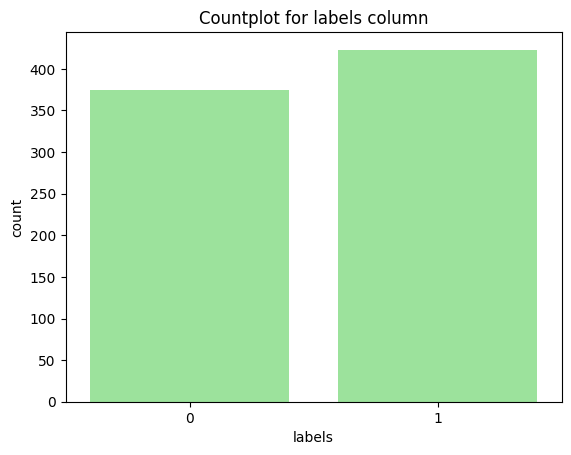

In [16]:
Nws_Fkese.countplot(x ='labels', data = Nws_Fke,color='lightgreen')
Nws_Fkema.title("Countplot for labels column")
Nws_Fkema.show()

In [17]:
## Removing stopwards
import nltk as Nws_Fkenl
Nws_Fkenl.download('stopwords')
import regex as Nws_Fkerg
from nltk.corpus import stopwords as Nws_Fkesw
Nws_Fkesw_H = Nws_Fkesw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def Fke_de(nw):
    nw = nw.lower()
    nw = Nws_Fkerg.sub("[^a-z]+", " ", nw)
    nw = " ".join([m for m in nw.split() if m not in Nws_Fkesw_H])
    return nw

In [19]:
nw_D=[]
for ax in Nws_Fke['article_content']:
    nw_D.append(Fke_de(ax))
nw_D[:20]

['wed apr syria attack symptoms consistent nerve agent use victims suspected chemical attack syria appeared show symptoms consistent reaction nerve agent world health organization said wednesday cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents said statement putting death toll least united states said deaths caused sarin nerve gas dropped syrian aircraft russia said believes poison gas leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria russian defence ministry spokesman say agent used attack said rebels used chemical weapons aleppo last year said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagnosis treatment patients medicines atropine antidote types c

In [20]:
Nws_Fke['article_content']=nw_D
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
799,turkish bombardment kills civilians syria turk...,1
800,martyrs terrorists shell aleppos salah eddin s...,1
801,chemical attack kills five syrians aleppo sana...,0
802,killed russian military chopper shot syria fiv...,1


In [21]:
nw_D=[]
for ax in Nws_Fke['article_content']:
    nw_D.append(Fke_de(ax))
nw_D[:20]

['wed apr syria attack symptoms consistent nerve agent use victims suspected chemical attack syria appeared show symptoms consistent reaction nerve agent world health organization said wednesday cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents said statement putting death toll least united states said deaths caused sarin nerve gas dropped syrian aircraft russia said believes poison gas leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria russian defence ministry spokesman say agent used attack said rebels used chemical weapons aleppo last year said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagnosis treatment patients medicines atropine antidote types c

In [22]:
nw_D=[]
for ax in Nws_Fke['article_content']:
    nw_D.append(Fke_de(ax))
nw_D[:20]

['wed apr syria attack symptoms consistent nerve agent use victims suspected chemical attack syria appeared show symptoms consistent reaction nerve agent world health organization said wednesday cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents said statement putting death toll least united states said deaths caused sarin nerve gas dropped syrian aircraft russia said believes poison gas leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria russian defence ministry spokesman say agent used attack said rebels used chemical weapons aleppo last year said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagnosis treatment patients medicines atropine antidote types c

In [23]:
Nws_Fke.to_csv('/purr_FA-KES-Dataset.csv', index=False)

In [24]:
#TFIDF Vectorization-linear Ml and Boosting Models

In [26]:
Nws_Fke = Nws_Fkepnn.read_csv('/purr_FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
793,turkish bombardment kills civilians syria turk...,1
794,martyrs terrorists shell aleppos salah eddin s...,1
795,chemical attack kills five syrians aleppo sana...,0
796,killed russian military chopper shot syria fiv...,1


In [27]:
Nws_Fke['labels'].value_counts()

,count
labels,
1,423
0,375


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer as Nws_Fkefid

Nws_Fke_anl = Nws_Fkefid(analyzer='char', ngram_range= (1,1))
Nws_Fke_x = Nws_Fke_anl.fit_transform(Nws_Fke['article_content'].values.astype('U')).toarray()

In [29]:
print(Nws_Fke_x)

[[0.49834614 0.34500886 0.03184724 ... 0.01669601 0.07224908 0.00296566]
 [0.5257263  0.36434055 0.06166889 ... 0.         0.07100073 0.01929548]
 [0.52844823 0.33529129 0.09926659 ... 0.00539682 0.07662973 0.        ]
 ...
 [0.49609548 0.29837627 0.03989181 ... 0.01064682 0.06118975 0.00945582]
 [0.49691628 0.21605056 0.03632528 ... 0.01066444 0.09373916 0.00473573]
 [0.50391308 0.35312091 0.04236227 ... 0.00847963 0.06497917 0.02259318]]


In [30]:
Nws_Fke_y = Nws_Fke['labels']

In [31]:
from imblearn.over_sampling import SMOTE as Nws_Fke_sme
from collections import Counter as Nws_Fke_cttr
print('Original Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))
Nws_Fke_MM = Nws_Fke_sme()
Nws_Fke_x, Nws_Fke_y = Nws_Fke_MM.fit_resample(Nws_Fke_x, Nws_Fke_y)
print('Resampled Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))


Original Nws_Fke datashape Counter({1: 423, 0: 375})
Resampled Nws_Fke datashape Counter({0: 423, 1: 423})


In [32]:
Nws_Fke_x.shape

(846, 27)

In [35]:
Nws_Fke_y.shape

(846,)

In [33]:
from sklearn.model_selection import train_test_split as Nws_Fkennes

Nws_si =0.4
Nws_rs = 31
Nws_sii =0.5

In [34]:
Nws_Fke_xN, Nws_Fke_xS, Nws_Fke_yN, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_x, Nws_Fke_y, test_size=Nws_si, random_state= Nws_rs)
Nws_Fke_xV, Nws_Fke_xS, Nws_Fke_yV, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_xS, Nws_Fke_yS, test_size= Nws_sii, random_state= Nws_rs)

print(Nws_Fke_xN.shape)
print(Nws_Fke_xV.shape)
print(Nws_Fke_xS.shape)

(507, 27)
(169, 27)
(170, 27)


### Linear ML models

In [36]:
from sklearn.metrics import classification_report as Nws_Fkeclc
from sklearn.metrics import confusion_matrix as Nws_Fkecos
from sklearn.metrics import ConfusionMatrixDisplay as Nws_Fkecud
from sklearn.model_selection import GridSearchCV as Nws_Fkegrs
import time as Nws_Fketme

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression as Nws_Fkelst

Nws_parm = { 'penalty': ['l2','l1','elasticnet',None],
               'solver': ['lbfgs','sag','saga','liblinear'],
               'C':[1.0,2.0,3.0,4.0]}


Nws_parm_Vo = Nws_Fkelst(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 1/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 2/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 2/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 1/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.660 total time=   0.0s
[CV 2/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 2/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.500 total time=   0.0s
[CV 1/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 1/2; 3/64] END C=1.0, penalty=l2, solver=saga;, score=0.660 total time=   0.0s
[CV 2/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 2/2; 3/64] END C=1.0, penalty=l2,


 training period: 0.06292557716369629 

              precision    recall  f1-score   support

           0       0.53      0.45      0.49        82
           1       0.55      0.62      0.58        87

    accuracy                           0.54       169
   macro avg       0.54      0.54      0.53       169
weighted avg       0.54      0.54      0.54       169


 validation period: 0.13704299926757812 



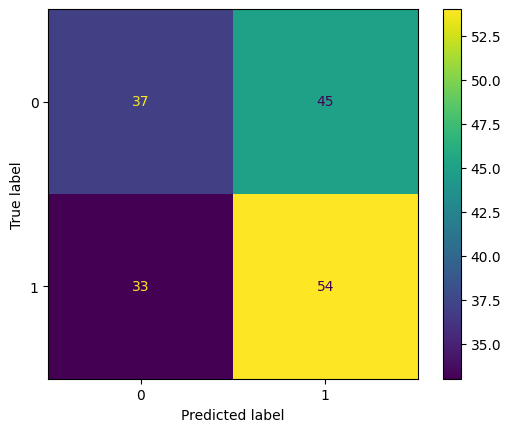

In [38]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl1= Nws_Fkelst(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl1.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.45      0.40      0.42        88
           1       0.42      0.48      0.45        82

    accuracy                           0.44       170
   macro avg       0.44      0.44      0.43       170
weighted avg       0.44      0.44      0.43       170


 testing period: 0.07735824584960938 



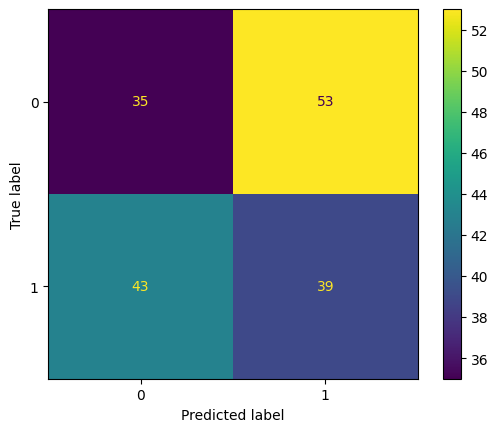

In [39]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier as Nws_Fkepvag

Nws_parm = { 'C': [1.0,3.0,5.0,6.0,7.0],
               'max_iter': [1000,1100,1200,1300],
               'tol':[1e-3,1e-4,1e-5,1e-6,1e-7]}


Nws_parm_Vo = Nws_Fkepvag(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 1/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.520 total time=   0.0s
[CV 2/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 2/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.580 total time=   0.0s
[CV 1/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 1/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.520 total time=   0.0s
[CV 2/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 2/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.580 total time=   0.0s
[CV 1/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 1/2; 3/100] END C=1.0, max_iter=1000, tol=1e-05;, score=0.520 total time=   0.0s
[CV 2/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 2/2; 3/100] END C=1.


 training period: 0.004160881042480469 

              precision    recall  f1-score   support

           0       0.49      1.00      0.65        82
           1       0.00      0.00      0.00        87

    accuracy                           0.49       169
   macro avg       0.24      0.50      0.33       169
weighted avg       0.24      0.49      0.32       169


 validation period: 0.07009434700012207 



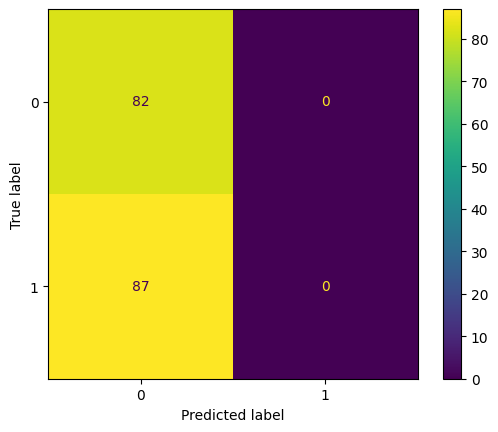

In [41]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl2= Nws_Fkepvag(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl2.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.51      0.99      0.68        88
           1       0.00      0.00      0.00        82

    accuracy                           0.51       170
   macro avg       0.26      0.49      0.34       170
weighted avg       0.27      0.51      0.35       170


 testing period: 0.08119750022888184 



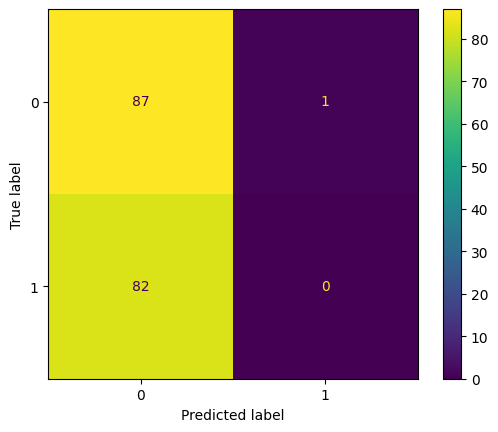

In [42]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LinearSVC

In [43]:
from sklearn.svm import LinearSVC as Nws_Fkelisv

Nws_parm = { 'penalty': ['l1','l2'],
               'loss': ['squared_hinge','hinge'],
               'C':[2.0,3.0,4.0,5.0]}


Nws_parm_Vo = Nws_Fkelisv(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 1/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 2/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 1/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.680 total time=   0.0s
[CV 2/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 2/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.600 total time=   0.0s
[CV 1/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 1/2; 3/16] END .C=2.0, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 2/2; 3/16] E


 training period: 0.01380777359008789 

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        82
           1       0.51      0.54      0.53        87

    accuracy                           0.50       169
   macro avg       0.50      0.50      0.50       169
weighted avg       0.50      0.50      0.50       169


 validation period: 0.06752705574035645 



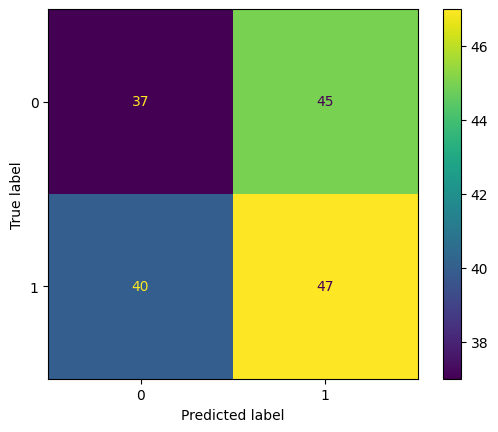

In [44]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl3= Nws_Fkelisv(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl3.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        88
           1       0.43      0.51      0.47        82

    accuracy                           0.44       170
   macro avg       0.44      0.44      0.43       170
weighted avg       0.44      0.44      0.43       170


 testing period: 0.2723240852355957 



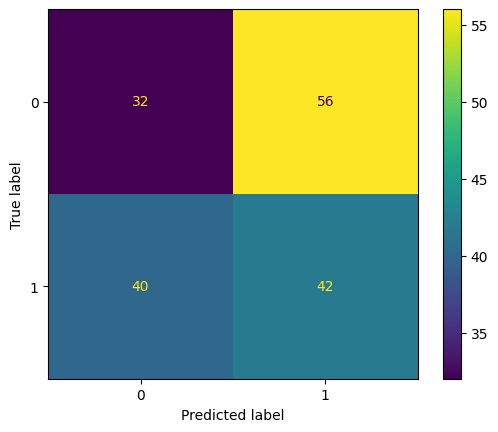

In [45]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        88
           1       0.43      0.51      0.47        82

    accuracy                           0.44       170
   macro avg       0.44      0.44      0.43       170
weighted avg       0.44      0.44      0.43       170


 testing period: 0.06511330604553223 



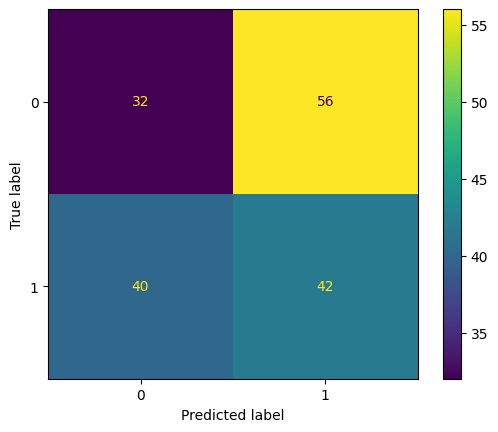

In [46]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        88
           1       0.43      0.51      0.47        82

    accuracy                           0.44       170
   macro avg       0.44      0.44      0.43       170
weighted avg       0.44      0.44      0.43       170


 testing period: 0.06462454795837402 



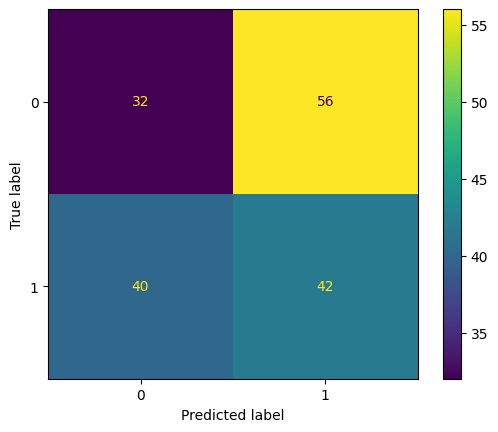

In [47]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

### Boosting models

#### XGBM

In [48]:
from xgboost import XGBClassifier as Nws_Fkexgrb

Nws_parm = { 'subsample': [0.03,0.07,0.08,0.06],
              'learning_rate': [0.01,0.02,0.04,0.05],
              'n_estimators':[20,30,40,50,60]}


Nws_parm_Vo = Nws_Fkexgrb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 1/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.520 total time=   0.1s
[CV 2/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 2/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.500 total time=   0.0s
[CV 1/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 1/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.480 total time=   0.0s
[CV 2/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 2/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.500 total time=   0.0s
[CV 1/2; 3/80] START learning_rate=0.01, n_estimators=20, subsample=0.08........
[CV 1/2; 3/80] END learning_rate=0.01, n_estimators=20, subsample=0.08;, score=0.480 total time=   0.0s
[CV 2/2; 3/80


 training period: 0.024313926696777344 

              precision    recall  f1-score   support

           0       0.54      0.60      0.57        82
           1       0.58      0.53      0.55        87

    accuracy                           0.56       169
   macro avg       0.56      0.56      0.56       169
weighted avg       0.56      0.56      0.56       169


 validation period: 0.06888198852539062 



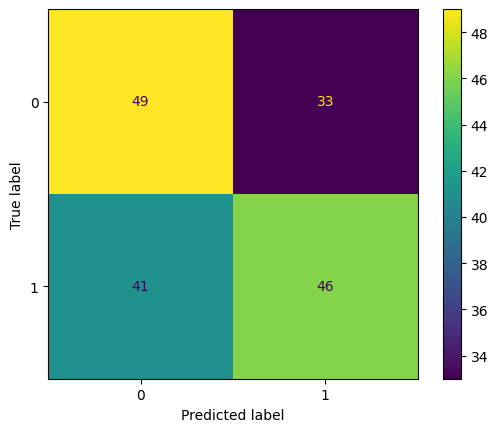

In [49]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl4= Nws_Fkexgrb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl4.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.47      0.36      0.41        88
           1       0.45      0.56      0.50        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.46      0.46      0.45       170


 testing period: 0.07151222229003906 



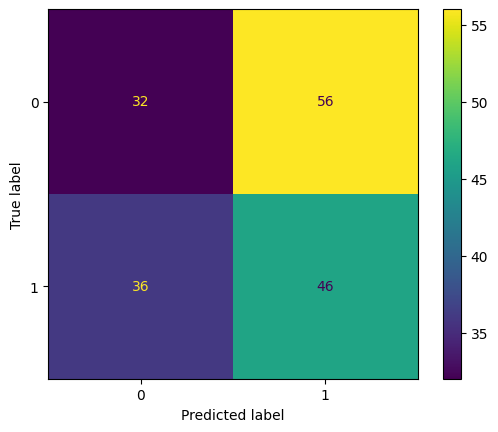

In [50]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LightGBM

In [51]:
from lightgbm import LGBMClassifier as Nws_Fkeligb

Nws_parm = { 'num_leaves': [2,4,6,8],
              'max_depth': [3,5,7,9],
              'n_estimators':[10,30,40,50,60]}


Nws_parm_Vo = Nws_Fkeligb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/2; 15/80] END max_depth=3, n_estimators=50, num_leaves=6;, score=0.620 total time=   0.1s
[CV 1/2; 16/80] START max_depth=3, n_estimators=50, num_leaves=8................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4400
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.023387432098388672 

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        82
           1       0.57      0.54      0.55        87

    accuracy                           0.55       169
   macro avg       0.55      0.55      0.55       169
weighted avg       0.55      0.55      0.55       169


 validation period: 0.061095237731933594 



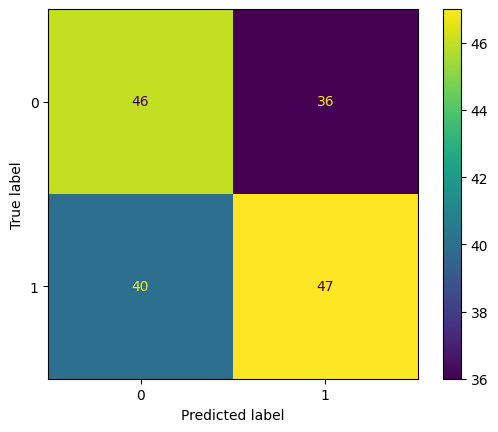

In [52]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl5= Nws_Fkeligb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl5.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        88
           1       0.44      0.41      0.43        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.46      0.46      0.46       170


 testing period: 0.3212881088256836 



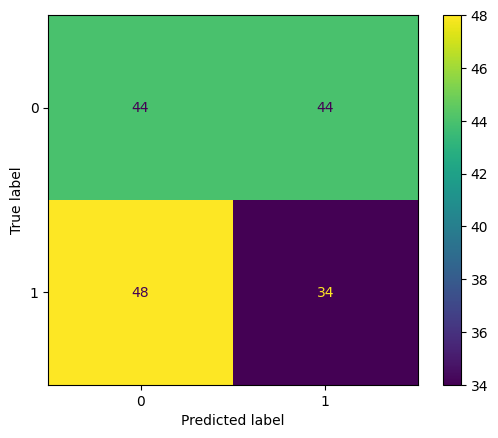

In [53]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### CatBoost

In [54]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [55]:
from catboost import CatBoostClassifier as Nws_Fkecttb

Nws_parm = { 'learning_rate': [0.01,0.02,0.03,0.04],
              'n_estimators': [10,20,40,70],
              'max_depth':[3,5,6,8]}


Nws_parm_Vo = Nws_Fkecttb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6906381	total: 47.8ms	remaining: 430ms
1:	learn: 0.6874701	total: 49.4ms	remaining: 198ms
2:	learn: 0.6856273	total: 52.5ms	remaining: 123ms
3:	learn: 0.6833056	total: 57.4ms	remaining: 86.1ms
4:	learn: 0.6804979	total: 58.8ms	remaining: 58.8ms
5:	learn: 0.6776066	total: 60.7ms	remaining: 40.5ms
6:	learn: 0.6723348	total: 62.7ms	remaining: 26.9ms
7:	learn: 0.6684487	total: 64.5ms	remaining: 16.1ms
8:	learn: 0.6659777	total: 66.2ms	remaining: 7.36ms
9:	learn: 0.6644828	total: 68.1ms	remaining: 0us
[CV 1/2; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.560 total time=   0.1s
[CV 2/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6907140	total: 1.14ms	remaining: 10.2ms
1:	learn: 0.6887461	total: 3.99ms	remaining: 16ms
2:	learn: 0.6869989	total: 5.57ms	remaining: 13ms
3:	learn:

0:	learn: 0.6917438	total: 12ms	remaining: 826ms
1:	learn: 0.6890378	total: 34.4ms	remaining: 1.17s
2:	learn: 0.6871854	total: 49.9ms	remaining: 1.11s
3:	learn: 0.6846991	total: 62.4ms	remaining: 1.03s
4:	learn: 0.6831607	total: 75.8ms	remaining: 986ms
5:	learn: 0.6811794	total: 93.6ms	remaining: 999ms
6:	learn: 0.6796155	total: 107ms	remaining: 964ms
7:	learn: 0.6781596	total: 119ms	remaining: 926ms
8:	learn: 0.6766387	total: 134ms	remaining: 907ms
9:	learn: 0.6752678	total: 155ms	remaining: 928ms
10:	learn: 0.6733608	total: 167ms	remaining: 894ms
11:	learn: 0.6705970	total: 206ms	remaining: 994ms
12:	learn: 0.6678323	total: 226ms	remaining: 990ms
13:	learn: 0.6664603	total: 245ms	remaining: 979ms
14:	learn: 0.6654272	total: 270ms	remaining: 991ms
15:	learn: 0.6630737	total: 281ms	remaining: 950ms
16:	learn: 0.6616997	total: 298ms	remaining: 930ms
17:	learn: 0.6610139	total: 318ms	remaining: 917ms
18:	learn: 0.6597755	total: 327ms	remaining: 878ms
19:	learn: 0.6574916	total: 344ms	rem

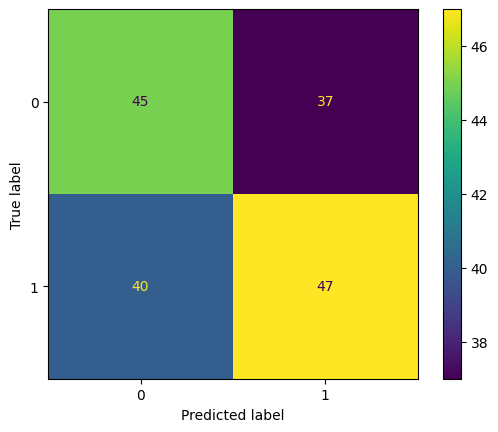

In [56]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl6= Nws_Fkecttb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl6.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.44      0.46        88
           1       0.44      0.48      0.46        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.46      0.46      0.46       170


 testing period: 0.3012065887451172 



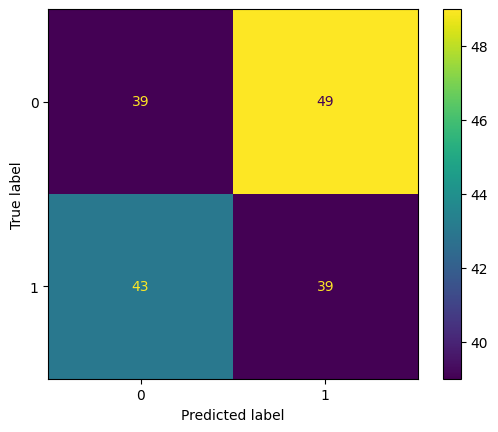

In [57]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")